In [78]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [66]:
torch.__version__

'2.1.0+cu121'

In [67]:
def plot_predictions(train_data,
                    train_labels,
                    test_data,
                    test_labels,
                    predctions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predctions is not None:
        plt.scatter(test_data, predctions, c="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14})
    plt.show()

In [68]:
def plot_loss(epoch_count, loss_values, test_loss_values):

    plt.scatter(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss", s=4)
    plt.scatter(epoch_count, test_loss_values, label="Test loss", s=4)
    plt.title("Training and test loss curves")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend(prop={"size": 14})

In [69]:
weight = 0.7
bias = 0.3

# Range Values
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
# X[:10], y[:10]

In [70]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                    out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

In [71]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
# print(len(X_train), len(X_test))

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

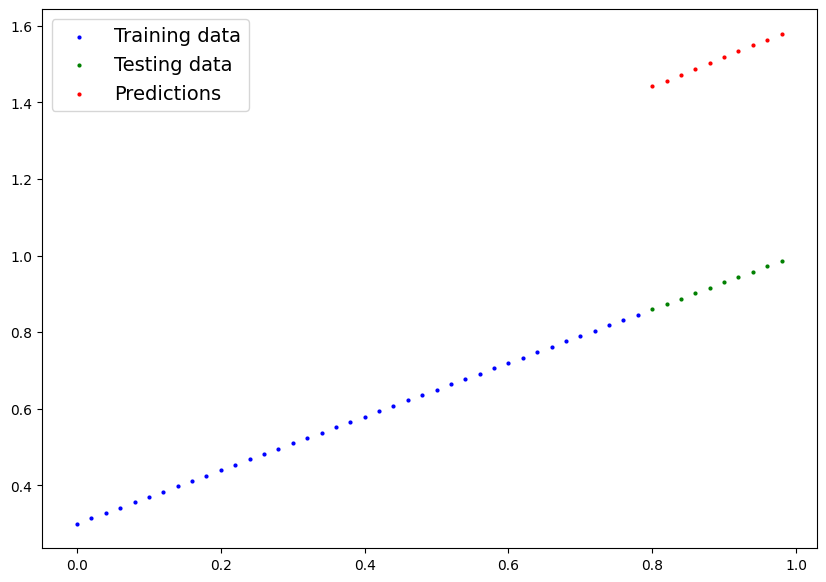

In [72]:
y_preds = model_1(X_test)
# len(X_train), leuen(y_train), len(X_test), len(y_test), len(y_preds)
plot_predictions(X_train, y_train, X_test, y_test, predctions=y_preds.detach().numpy())


In [73]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
    lr=0.01)

torch.manual_seed(42)

epochs = 130

epoch_count = []
loss_values = []
test_loss_values = []

In [74]:
for epoch in range(epochs):
    model_1.train()
    epoch_count.append(epoch)
    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)
    loss_values.append(loss)
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    #testing

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

        test_loss_values.append(test_loss)

    if epoch % 10 == 0:

        print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        # print(model_1.state_dict())

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.4399680495262146 | Test Loss: 0.4392663538455963
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954827964305878 | Test Loss: 0.16984674334526062
Epoch: 40 | Loss: 0.09433844685554504 | Test Loss: 0.03513689711689949
Epoch: 50 | Loss: 0.023886386305093765 | Test Loss: 0.04784906655550003
Epoch: 60 | Loss: 0.0199567973613739 | Test Loss: 0.04580312222242355
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.0375305712223053
Epoch: 80 | Loss: 0.013089170679450035 | Test Loss: 0.029944902285933495
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215679459273815 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.002787243574857712 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801807537674904


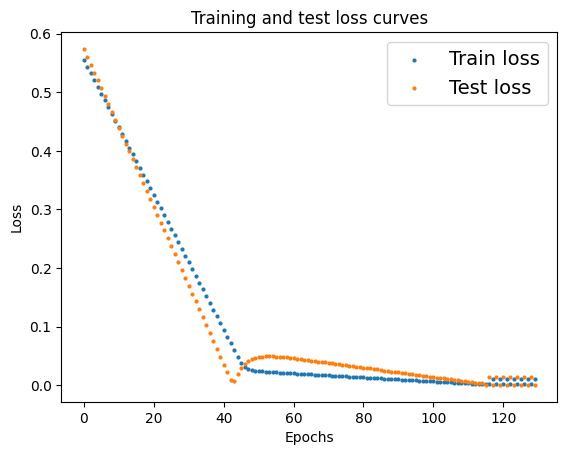

In [75]:
plot_loss(epoch_count, loss_values, test_loss_values)


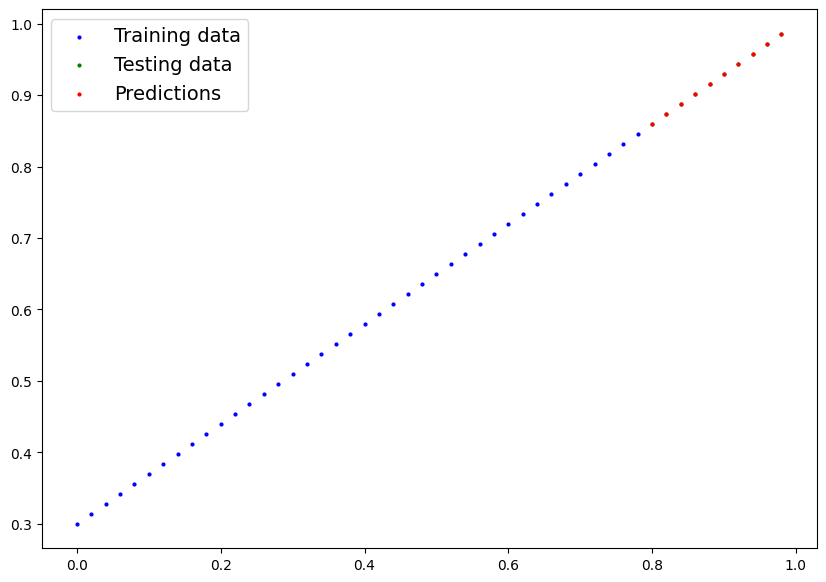

In [76]:
with torch.inference_mode():
  y_preds = model_1(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [81]:
model_path = Path("models")
model_path.mkdir(parents=True, exist_ok=True)

model_name = "01_pytorch_model_1.pth"
model_save_path = model_path / model_name

print(f"Saving model to: {model_save_path}")
torch.save(obj=model_1.state_dict(),
        f=model_save_path)

Saving model to: models/01_pytorch_model_1.pth


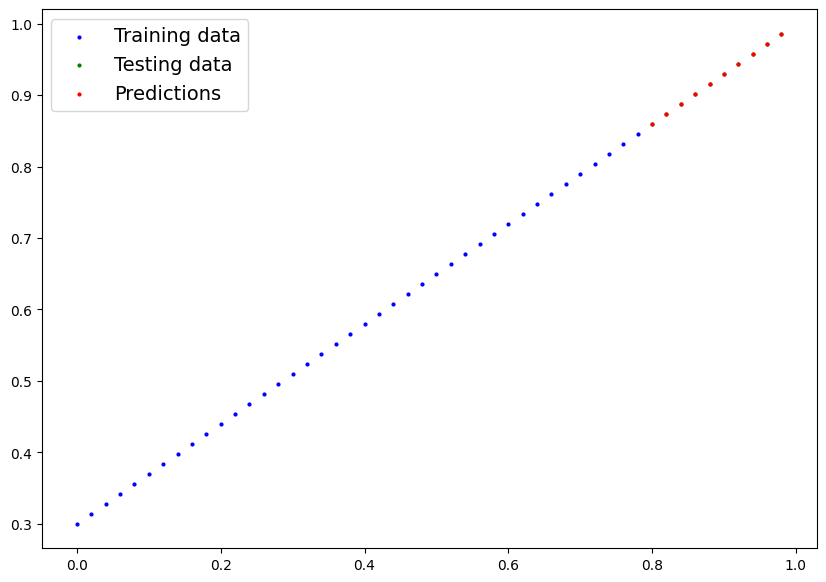

In [83]:
new_model_1 = LinearRegressionModelV2()
new_model_1.load_state_dict(torch.load(f=model_save_path))

with torch.inference_mode():
  new_y_preds = new_model_1(X_test)

plot_predictions(X_train, y_train, X_test, y_test, new_y_preds)